# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 11.3 MB/s eta 0:00:00


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split


# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

from sklearn import metrics

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from a CSV file into a Pandas DataFrame
sk_forecast = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Model_Deployment_Project/SuperKart.csv')

In [ ]:
# make a copy of sk_forecast dataframe
df = sk_forecast.copy()

# **Data Overview**

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
# Display the number of rows and columns in the dataset
df.shape

(8763, 12)

In [ ]:
# Display the column names of the dataset
df.columns

Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

Let's start by defining the target and predictor (numerical and categorical) variables.

- We'll not consider the `Product_Id` and `Store_Id` attributed as they don't add value to the analysis and consequent modeling.


## Univariate Analysis

**Checking the statistical summary of the data.**

In [ ]:
df.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640
std,2.217320,0.048204,30.694110,8.388381,1065.630494
min,4.000000,0.004000,31.000000,1987.000000,33.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000


In [ ]:
# Displaying Ggeneral information for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Checking for Duplicate Entries in the Data**

In [ ]:
# Checking if there are any duplicates in the dataset
df.duplicated().sum()

np.int64(0)

- There were  no duplicate rows in the dataset

### Analyzing Proportional Representation of Categorical Variables in Dataset

In [ ]:
# For Product Type
df['Product_Type'].astype('category').value_counts(normalize=True, ascending=False).to_frame()

,proportion
Product_Type,
Fruits and Vegetables,0.142531
Snack Foods,0.131119
Frozen Foods,0.092548
Dairy,0.090836
Household,0.084446
Baking Goods,0.081707
Canned,0.077257
Health and Hygiene,0.071665
Meat,0.070524


In [ ]:
#Counts for each category in Store_Type as proportions
df['Store_Type'].astype('category').value_counts(normalize=True)

,proportion
Store_Type,
Supermarket Type2,0.533607
Supermarket Type1,0.180988
Departmental Store,0.153943
Food Mart,0.131462


In [ ]:
df['Store_Location_City_Type'].astype('category').value_counts(normalize=True)

,proportion
Store_Location_City_Type,
Tier 2,0.714595
Tier 1,0.153943
Tier 3,0.131462


## **Bivariate Analysis**

### **Correlational Analysis**

<Figure size 1000x500 with 0 Axes>

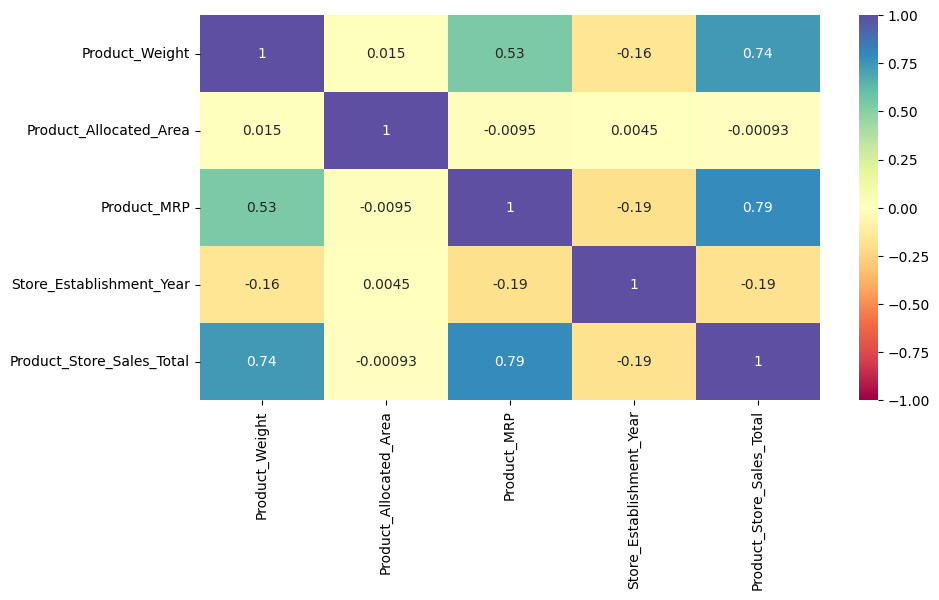

In [ ]:
plt.figure(figsize=(10,5))
#sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1) # Corrected Code
plt.show();

- There is a strong positive correlation between Product_MRP and Product_Store_Sales_Total of 0.79. This could be expected as products with larger max retail prices impact product store sales totals.

- There is a strong positive correlation between Product_Weight and Product_Store_Sales_Total of 0.79. Also, expected since there is a correlation between Product_MRP and Product_Weight.

- The remaining numerical attributes do not have an impactful correlation (either negative or positive) to Product_Store_Sales_Total.




### **Analyzing Store Type to Product Store Sales Totals**

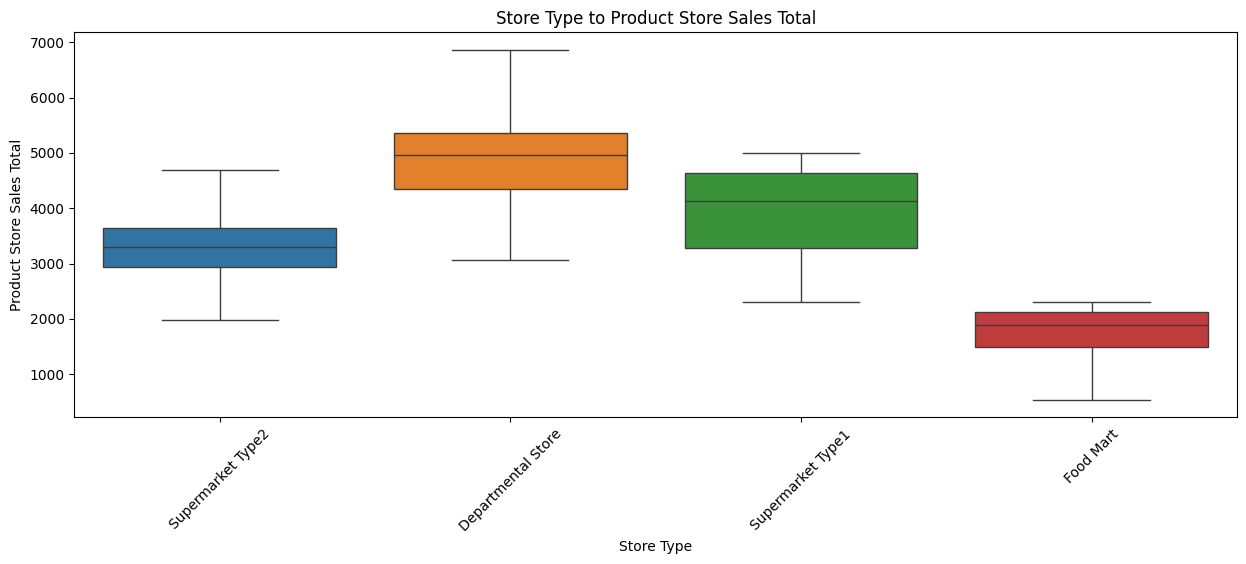

In [ ]:
# Box Plot plotting Product_Store_Sales_Total by Store_Type.
plt.figure(figsize=(15,5))
plt.xlabel('Store Type')
plt.ylabel('Product Store Sales Total')
plt.xticks(rotation=45)
plt.title('Store Type to Product Store Sales Total')
sns.boxplot(data=df,x='Store_Type',y='Product_Store_Sales_Total',showfliers=False, hue = 'Store_Type', legend=False)
plt.show()



In [ ]:
# Table plot for Mean values for Product_Store_Sales_Total, grouped and sorted by Store type.
df_mean_store = df.groupby(['Store_Type'])['Product_Store_Sales_Total'].mean().reset_index().sort_values(by=['Product_Store_Sales_Total', 'Store_Type'], ascending= False )
print(df_mean_store)

           Store_Type  Product_Store_Sales_Total
0  Departmental Store                4946.966323
2   Supermarket Type1                3923.778802
3   Supermarket Type2                3299.312111
1           Food Mart                1762.942465


- Departmental Store type had the highest average total sales among the store types.
- Department Store type had a 26% higher average than the next highest average being from Supermarket Type1 store, 4947 and 3924, respectively.
- Food Mart had the lowest average of $1763 of product sales totals, and it is expected since food marts are smaller, offer most likely less products and smaller types of products with repect to quantity packeges.

### **Analyzing Product Type to Product Store Sales_Total**

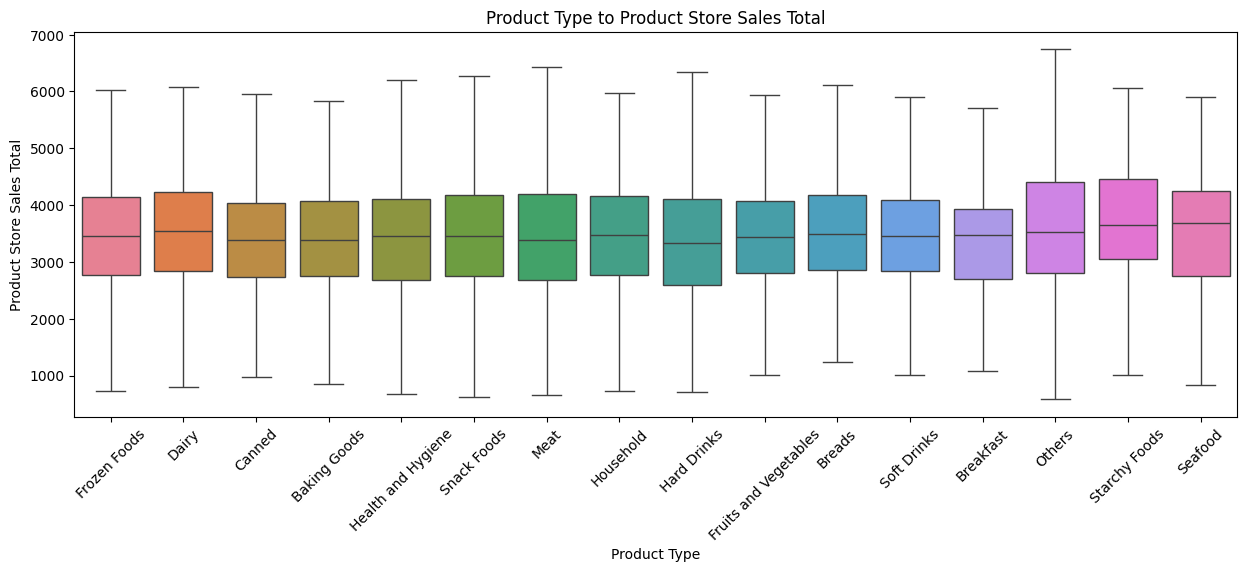

In [ ]:
# Box Plot plotting Product_Type to Product_Store_Sales_Total
plt.figure(figsize=(15,5))
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales Total')
plt.xticks(rotation=45)
plt.title('Product Type to Product Store Sales Total')
sns.boxplot(data=df,x='Product_Type',y='Product_Store_Sales_Total',showfliers=False, hue ='Product_Type', legend=False)
plt.show()

In [ ]:
# Table plot for Median values for each Product_Type, Store_Location_City_Type and Product_Store_Sales_Total and sort by Product_Type and then Store_Location_City_Type
df_median_products = df.groupby(['Product_Type'])['Product_Store_Sales_Total'].median().reset_index().sort_values(by=['Product_Store_Sales_Total', 'Product_Type'], ascending= False )
print(df_median_products)

             Product_Type  Product_Store_Sales_Total
12                Seafood                   3682.465
15          Starchy Foods                   3655.170
4                   Dairy                   3536.275
11                 Others                   3518.550
1                  Breads                   3486.950
9               Household                   3472.355
2               Breakfast                   3468.500
13            Snack Foods                   3464.610
5            Frozen Foods                   3458.090
14            Soft Drinks                   3453.340
8      Health and Hygiene                   3449.280
6   Fruits and Vegetables                   3440.900
10                   Meat                   3384.025
3                  Canned                   3381.600
0            Baking Goods                   3377.725
7             Hard Drinks                   3337.970


In [ ]:
# Table plot for Mean values for each Product_Type, Store_Location_City_Type and Product_Store_Sales_Total and sort by Product_Type and then Store_Location_City_Type
df_mean_products = df.groupby(['Product_Type'])['Product_Store_Sales_Total'].mean().reset_index().sort_values(by=['Product_Store_Sales_Total', 'Product_Type'], ascending= False )
print(df_mean_products)

             Product_Type  Product_Store_Sales_Total
15          Starchy Foods                3679.251418
11                 Others                3586.068212
12                Seafood                3584.263684
1                  Breads                3574.711200
4                   Dairy                3532.560352
13            Snack Foods                3471.711880
9               Household                3465.865095
5            Frozen Foods                3464.834562
14            Soft Drinks                3462.513911
8      Health and Hygiene                3445.393646
10                   Meat                3445.326764
6   Fruits and Vegetables                3443.421353
0            Baking Goods                3425.958101
2               Breakfast                3416.324623
3                  Canned                3397.463383
7             Hard Drinks                3364.594731


- The difference between the highest Mean amount,being Starchy Foods product type, and the lowest Mean , being Hard Drinks product type is minimal at 315.

- The difference between the highest Median amount,being Seafoods product type, and the lowest Mean, being again Hard Drinks product type is minimal as well at 344.


### **Analyzing Store Location City to Product Store Sales_Total Segmented by Product Type**

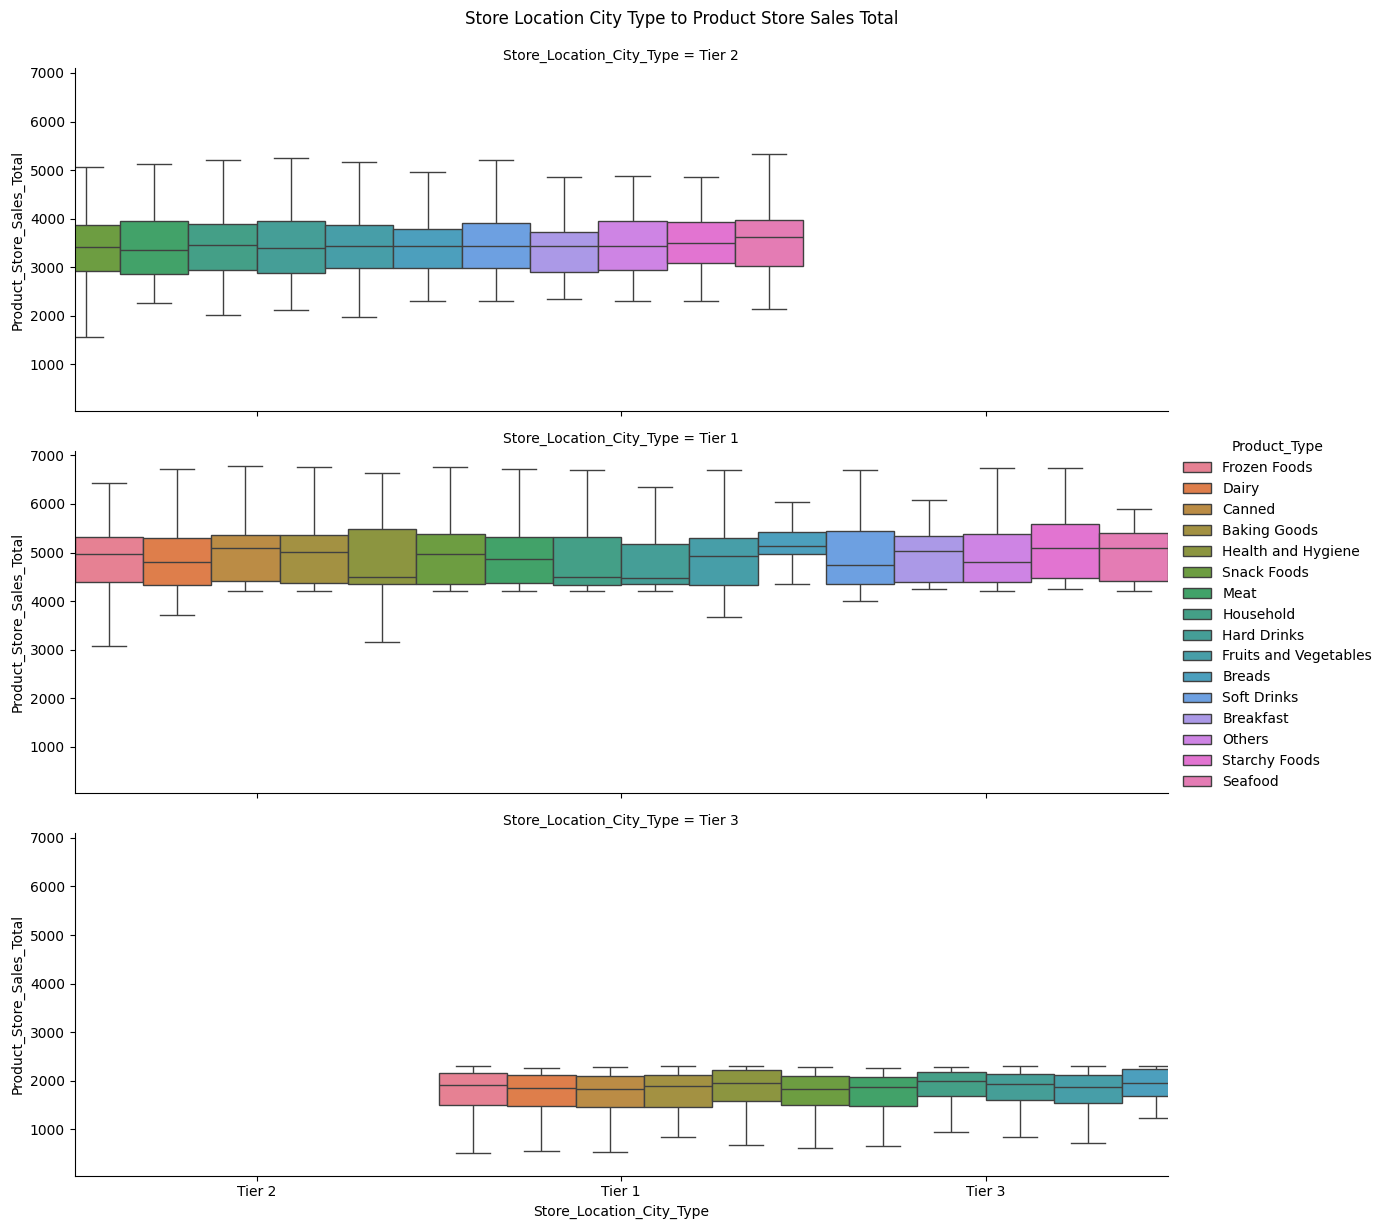

In [ ]:
# Catplot plotting Store Location City Type to Product_Store_Sales_Total Segemented by Product Type.
sns.catplot(
    data=df,
    x='Store_Location_City_Type',
    y='Product_Store_Sales_Total',
    hue='Product_Type',
    kind='box',  # Specify the type of plot
    row='Store_Location_City_Type',  # Create a separate subplot for each Store_Location_City_Type in rows
    showfliers=False,
    height=4,  # Height of each subplot
    aspect=3,  # Adjust aspect ratio for wider subplots when in rows
    legend_out=True, # Place the legend outside the plots
    width=3.0 # Increase the width of the box plots
)

plt.suptitle('Store Location City Type to Product Store Sales Total', y=1.02) # Add a main title
plt.show()

- There was no significant difference of Product type

In [ ]:
# Table plot for Median values for each Product_Type, Store_Location_City_Type for Product_Store_Sales_Total, segmented and sorted by Product_Type  and Store Location.
df_median_products = df.groupby(['Product_Type', 'Store_Location_City_Type'])['Product_Store_Sales_Total'].median().reset_index().sort_values(by=['Product_Store_Sales_Total', 'Product_Type','Store_Location_City_Type'], ascending= False )
print(df_median_products)

             Product_Type Store_Location_City_Type  Product_Store_Sales_Total
3                  Breads                   Tier 1                   5128.995
9                  Canned                   Tier 1                   5096.735
36                Seafood                   Tier 1                   5087.860
45          Starchy Foods                   Tier 1                   5085.300
6               Breakfast                   Tier 1                   5031.710
0            Baking Goods                   Tier 1                   5009.100
15           Frozen Foods                   Tier 1                   4974.955
39            Snack Foods                   Tier 1                   4961.450
18  Fruits and Vegetables                   Tier 1                   4936.325
30                   Meat                   Tier 1                   4877.630
12                  Dairy                   Tier 1                   4797.650
33                 Others                   Tier 1              

In [ ]:
# Table plot for Mean values for each Product_Type, Store_Location_City_Type for Product_Store_Sales_Total, segmented and sorted by Product_Type  and Store Location.
df_mean_products = df.groupby(['Product_Type', 'Store_Location_City_Type'])['Product_Store_Sales_Total'].mean().reset_index().sort_values(by=['Product_Store_Sales_Total', 'Product_Type','Store_Location_City_Type'], ascending= False )
print(df_mean_products)

             Product_Type Store_Location_City_Type  Product_Store_Sales_Total
3                  Breads                   Tier 1                5158.586176
45          Starchy Foods                   Tier 1                5126.378571
6               Breakfast                   Tier 1                5033.372632
9                  Canned                   Tier 1                5027.168556
36                Seafood                   Tier 1                5025.960000
33                 Others                   Tier 1                4998.867188
0            Baking Goods                   Tier 1                4968.769697
39            Snack Foods                   Tier 1                4938.228172
12                  Dairy                   Tier 1                4936.654759
24     Health and Hygiene                   Tier 1                4934.148090
42            Soft Drinks                   Tier 1                4933.058108
18  Fruits and Vegetables                   Tier 1              

- The Product type Bread category is the top contributor to the total sales in in two of the three store locations (Tier 1 and Tier 3) with a Medium of 5159 and 1888, respectively.
-

* We see that the data type for Store_Establishment_Year was changed for date time type.
* There are 4 numerical columns, 7 object type columns, and 1 date time column in the data.
* There are no missing data in any of the columns.

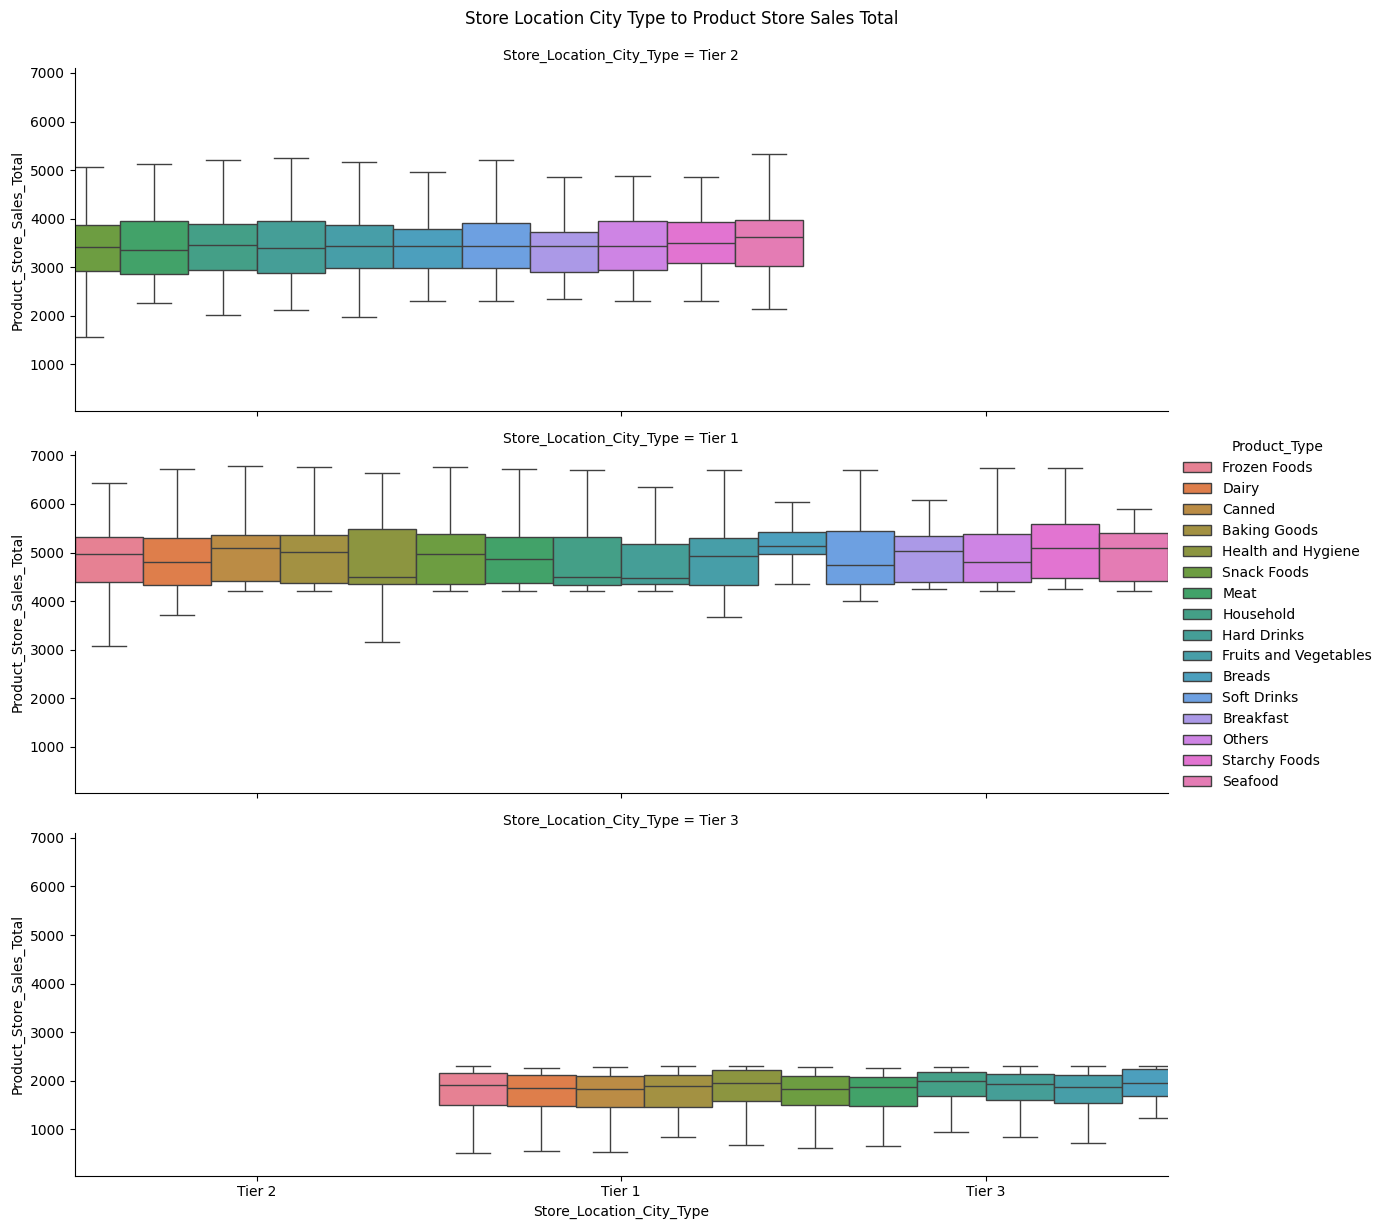

In [ ]:
# Catplot plotting Store Location City Type to Product_Store_Sales_Total.
sns.catplot(
    data=df,
    x='Store_Location_City_Type',
    y='Product_Store_Sales_Total',
    hue='Product_Type',
    kind='box',  # Specify the type of plot
    row='Store_Location_City_Type',  # Create a separate subplot for each Store_Location_City_Type in rows
    showfliers=False,
    height=4,  # Height of each subplot
    aspect=3,  # Adjust aspect ratio for wider subplots when in rows
    legend_out=True, # Place the legend outside the plots
    width=3.0 # Increase the width of the box plots
)

plt.suptitle('Store Location City Type to Product Store Sales Total', y=1.02) # Add a main title
plt.show()

### **Analyzing Store Type Year to Product Store Sales Totals Segmented by Store Establishment Year**

In [ ]:
# convert to year datetime Store_Establishment_Year but only using Year only
df['Store_Establishment_Year'] = pd.to_datetime(df['Store_Establishment_Year'], format='%Y')

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009-01-01,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999-01-01,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987-01-01,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987-01-01,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998-01-01,Small,Tier 3,Food Mart,2279.36


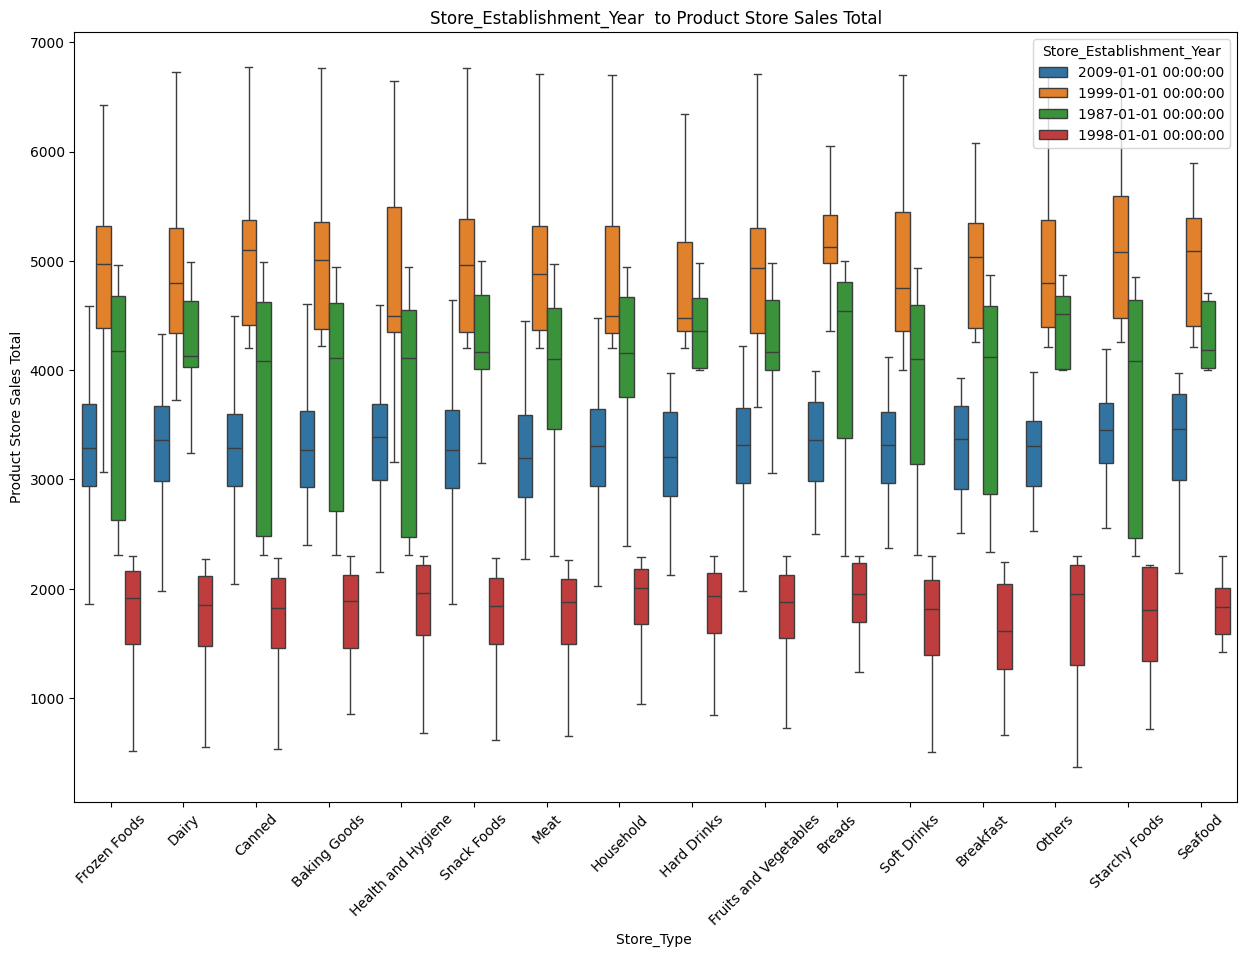

In [ ]:
#Box Plot plotting Product_Type to Product_Store_Sales_Total
plt.figure(figsize=(15,10))
plt.xlabel('Store_Type ')
plt.ylabel('Product Store Sales Total')
plt.xticks(rotation=45)
plt.title('Store_Establishment_Year  to Product Store Sales Total')
sns.boxplot(data=df,x='Product_Type',y='Product_Store_Sales_Total',showfliers=False, hue ='Store_Establishment_Year', legend=True)
plt.show()

# **Data Preprocessing**

In [ ]:
# List of numerical features in the dataset
numeric_features = [
    'Product_Weight',            # Weight of each product.
    'Product_Allocated_Area',    # Ratio of the allocated display area of each product to the total display area.
    'Product_MRP',               # Maximum retail price of each product.
]

# List of categorical features in the dataset
categorical_features = [ 'Product_Sugar_Content',       # Sugar content of each product.
                         'Product_Type',                # Broad category for each product.
                         'Store_Size',                  # Size of the store depending on sq. feet.
                         'Store_Location_City_Type',    # Type of city tiered based of standars of living.
                         'Store_Type'                   # Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart.
]

In [ ]:
# Selected Product_Store_Sales_Total as the predictive variable
target = 'Product_Store_Sales_Total'

In [ ]:
# Define predictor matrix (X) using selected numeric and categorical features
X = df[numeric_features + categorical_features]

# Define target variable
y = df[target]

In [ ]:
# Split the dataset into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

In [ ]:
# Create a preprocessing pipeline for numerical and categorical features
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # Scale numeric features to have mean equal to 0 and standard deviation equal to 1
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features as one-hot vectors
)

### **Breakdown:**

1. **`StandardScaler()` for numeric features**  
   - Scales numerical columns (`tenure`, `MonthlyCharges`, `TotalCharges`, `SeniorCitizen`) to have **zero mean and unit variance**.  
   - This helps ML models handle features with different scales effectively.

2. **`OneHotEncoder()` for categorical features**  
   - Converts categorical columns (`Contract`, `PaperlessBilling`, `PaymentMethod`, etc.) into **one-hot encoded vectors**.  

# **Model Building**

### Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### **Model 1 - AdaBoost Regressor**





#### Initializing a Model

In [ ]:
# Initialize an AdaBoost Regressor
ab_regressor=AdaBoostRegressor(random_state=1)

#### Creating a Pipeline.

In [ ]:
# Create a machine learning pipeline with preprocessing and model training steps
model_pipeline_ada = make_pipeline(
    preprocessor,  # Preprocesses numerical and categorical features
    ab_regressor      # AdaBoost Regressor for model training
)

This creates a pipeline that

- **first preprocesses the data** (scaling numeric features and encoding categorical ones), and
- **then trains** the AdaBoost Regressor **model**.

It ensures that **all transformations are applied automatically before feeding the data into the model**.

#### Model Training

In [ ]:
# Train the model pipeline on the training data
model_pipeline_ada.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('adaboostregressor', AdaBoostRegressor(random_state=1))])

In [ ]:
# Make predictions on the training data
y_pred_train = model_pipeline_ada.predict(Xtrain)

# Make predictions on the test data
y_pred_test = model_pipeline_ada.predict(Xtest)

#### Performance Results

In [ ]:
# Generate a classification report to evaluate model performance on training set
print("Training Data Performance:")
model_perf_ada_train = model_performance_regression(model_pipeline_ada, Xtrain , ytrain)
print(model_perf_ada_train)

Training Data Performance:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  483.988378  381.448138   0.793442        0.793206  0.135348


In [ ]:
# Generate a classification report to evaluate model performance on test set
print("\nTest Data Performance:")
model_perf_ada_test = model_performance_regression(model_pipeline_ada, Xtest , ytest)
print(model_perf_ada_test)


Test Data Performance:
      RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  484.533  382.341564   0.794244          0.7933  0.134547


- an R-square of 0.7933 for the Test dataset capture 79.33% of the variance, which is good to very good.

- The penalized R-square , the Adjusted R-squared , was almost the same, and is expected considering the large dataset relative to the small number of independent variables.

- The almost identical R-squared results of for both the Train and Test dataset indicates the model is generalizing very well to unseen data, which is the primary goal of any predictive model.

- The model is reliable in real-world applications, where it will encounter new, unseen data.

- Therefore, the model is not overfitting (memorizing the training data) or underfitting (failing to learn patterns).

- Identical R- squared indicates that both the bias (error from erroneous assumptions) and variance (error from sensitivity to training data) are under control.

- Still roughly 20.67% of the variance is still unexplained by the model, therefore applying Hypertunning parametization and applying addtional hyperparameters may reduce the unexplained variance.

### **Model 2 - Gradient Boosting Regressor**

#### Initializing a Model

In [ ]:
gb_regressor=GradientBoostingRegressor(random_state=1)

#### Creating a Pipeline.

In [ ]:
# Create a machine learning pipeline with preprocessing and model training steps
model_pipeline_gb = make_pipeline(
    preprocessor,  # Preprocesses numerical and categorical features
    gb_regressor   # Gradient Boosting Regressor for model training
)

This creates a pipeline that

- **first preprocesses the data** (scaling numeric features and encoding categorical ones), and
- **then trains** the Gradient Boosting Regressor **model**.

It ensures that **all transformations are applied automatically before feeding the data into the model**.

#### Model Training

In [ ]:
# Train the model pipeline on the training data
model_pipeline_gb.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])

In [ ]:
# Make predictions on the training data
y_pred_train = model_pipeline_gb.predict(Xtrain)

# Make predictions on the test data
y_pred_test = model_pipeline_gb.predict(Xtest)

#### Performance Results

In [ ]:
# Generate a classification report to evaluate model performance on training set
print("Training Data Performance:")
model_perf_gb_train = model_performance_regression(model_pipeline_gb, Xtrain , ytrain)
print(model_perf_gb_train)

Training Data Performance:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  295.818735  138.125652   0.922835        0.922746  0.051419


In [ ]:
# Generate a classification report to evaluate model performance on test set
print("\nTest Data Performance:")
model_perf_gb_test = model_performance_regression(model_pipeline_gb, Xtest , ytest)
print(model_perf_gb_test)


Test Data Performance:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  310.429182  146.642219   0.915544        0.915156  0.051865


# **Model Performance Improvement - Hyperparameter Tuning**

###  **Model 1 - AdaBoost Regressor**

In [ ]:
ab_tuned = model_pipeline_ada

# Grid of parameters to choose from
# Corrected parameter names to include the pipeline step name 'adaboostregressor'
parameters = {'adaboostregressor__n_estimators': np.arange(10,100,10),
              'adaboostregressor__learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(Xtrain, ytrain)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('adaboostregressor',
                 AdaBoostRegressor(learning_rate=0.01,
                                   n_estimators=np.int64(60),
                                   random_state=1))])

#### Performance Results

In [ ]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, Xtrain,ytrain)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  451.441348  346.476609   0.820289        0.820084  0.125407


In [ ]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, Xtest,ytest)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  451.441348  346.476609   0.820289        0.820084  0.125407


- an R-square of 0.8203 for the Test dataset capture 82.03% of the variance, which is good to very good.

- The R-square improved from 0.7942 to 0.8203 when applied hyperparameter tunning

- The penalized R-square , the Adjusted R-squared , was almost the same, and is expected considering the large dataset relative to the small number of independent variables.

- The almost identical R-squared results for both the Train and Test dataset indicates the model is generalizing very well to unseen data, which is the primary goal of any predictive model.

- The model is reliable in real-world applications, where it will encounter new, unseen data.

- Therefore, the model is not overfitting (memorizing the training data) or underfitting (failing to learn patterns).

- Identical R- squared indicates that both the bias (error from erroneous assumptions) and variance (error from sensitivity to training data) are under control.

- Still roughly 17.97% of the variance is still unexplained by the model.

In [ ]:
# importance of features in the tree building

# Access the AdaBoostRegressor estimator within the pipeline
# The step name is the lowercase of the class name: 'adaboostregressor'
adaboost_estimator = ab_tuned.named_steps['adaboostregressor']

# Access the feature_importances_ attribute from the estimator
feature_importances = adaboost_estimator.feature_importances_

# Since the pipeline preprocesses the data (scaling and one-hot encoding),
# the feature importances will correspond to the features after preprocessing.
# Getting the feature names after one-hot encoding can be complex and depends on the specific OneHotEncoder output.
# For simplicity in demonstrating the fix, we will use dummy names if the number of importances
# doesn't match the original feature names. In a real scenario, you would need to
# construct the correct post-preprocessing feature names.
try:
    # Attempt to get feature names from the transformer if available
    # Note: This might require more sophisticated handling for OneHotEncoder output
    feature_names_out = ab_tuned.named_steps['columntransformer'].get_feature_names_out()
    if len(feature_importances) == len(feature_names_out):
        feature_names = feature_names_out
    else:
        # Fallback to generic names if feature names don't match the importance array size
        feature_names = [f"feature_{i}" for i in range(len(feature_importances))]
        print("Warning: Could not reliably map feature importances to original feature names after preprocessing.")

except AttributeError:
    # Fallback if get_feature_names_out is not available or fails
    feature_names = [f"feature_{i}" for i in range(len(feature_importances))]
    print("Warning: Could not reliably map feature importances to original feature names after preprocessing.")


print(pd.DataFrame(feature_importances, columns = ["Imp"], index = feature_names).sort_values(by = 'Imp', ascending = False))

                                                        Imp
standardscaler__Product_MRP                        0.374011
onehotencoder__Store_Size_Small                    0.145023
onehotencoder__Store_Location_City_Type_Tier 2     0.144848
onehotencoder__Store_Location_City_Type_Tier 3     0.097788
onehotencoder__Store_Type_Food Mart                0.090358
onehotencoder__Store_Type_Departmental Store       0.053915
onehotencoder__Store_Location_City_Type_Tier 1     0.041264
onehotencoder__Store_Type_Supermarket Type2        0.020929
onehotencoder__Store_Size_High                     0.017854
onehotencoder__Store_Type_Supermarket Type1        0.010660
standardscaler__Product_Weight                     0.003349
onehotencoder__Product_Sugar_Content_Low Sugar     0.000000
standardscaler__Product_Allocated_Area             0.000000
onehotencoder__Product_Sugar_Content_Regular       0.000000
onehotencoder__Product_Sugar_Content_reg           0.000000
onehotencoder__Product_Type_Baking Goods

-  The maximum retail price of each product - Product_MRP - has the highest impact in predicting or forecasting total sales. This was expected and reflects what the correlation analysis matrix showed for the strong 0.79 correlation with the target variable - Product_Store_Sales_Total.

-  Interestingly, the small stores -Store_Size_Small- was the second most important independent variable in predicting or forecasting total sales.

###  **Model 2 - Gradient Boosting Regressor**

In [ ]:
gb_tuned = model_pipeline_gb

# Grid of parameters to choose from
# Grid of parameters to choose from
parameters = {'gradientboostingregressor__n_estimators': np.arange(50,200,25),
              'gradientboostingregressor__subsample':[0.7,0.8,0.9,1],
              'gradientboostingregressor__max_features':[0.7,0.8,0.9,1],
              'gradientboostingregressor__max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(Xtrain, ytrain)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=7, max_features=0.8,
                                           n_estimators=np.int64(50),
                                           random_state=1, subsample=0.8))])

When performing a grid search on a pipeline, the parameters for the individual steps need to be specified using a specific syntax: step_name__parameter_name. The step name for the GradientBoostingRegressor in your pipeline is automatically generated as the lowercase version of its class name, which is gradientboostingregressor.

Therefore, the max_depth, n_estimators, subsample, and max_features parameters should be prefixed with gradientboostingregressor__.

#### Performance Results

In [ ]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, Xtrain, ytrain)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  184.601612  76.327413    0.96995        0.969916  0.025872


In [ ]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, Xtest, ytest)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  184.601612  76.327413    0.96995        0.969916  0.025872


# **Model Performance Comparison, Final Model Selection, and Serialization**

### **Model Performance Comparison and Best Model Selection.**

In [ ]:
models_comp_df = pd.concat(
    [model_perf_ada_train.T,
     model_perf_ada_test.T,
     ab_tuned_model_train_perf.T,
     ab_tuned_model_test_perf.T,
     model_perf_gb_train.T,
     model_perf_gb_test.T,
     gb_tuned_model_train_perf.T,
     gb_tuned_model_test_perf.T
    ],
    axis=1,
)

models_comp_df.columns = [

    "Adaboost Train",
    "Adaboost Test",
    "Adaboost Train Tuned",
    "Adaboost Test Tuned",
    "Gradient Boost Train",
    "Gradient Boost Test",
    "Gradient Boost Train Tuned",
    "Gradient Boost Test Tuned",
]

print("Training performance comparison:")
models_comp_df

Training performance comparison:


,Adaboost Train,Adaboost Test,Adaboost Train Tuned,Adaboost Test Tuned,Gradient Boost Train,Gradient Boost Test,Gradient Boost Train Tuned,Gradient Boost Test Tuned
RMSE,483.988378,484.533000,451.441348,451.431510,295.818735,310.429182,184.601612,281.677824
MAE,381.448138,382.341564,346.476609,348.717980,138.125652,146.642219,76.327413,115.637671
R-squared,0.793442,0.794244,0.820289,0.821396,0.922835,0.915544,0.969950,0.930464
Adj. R-squared,0.793206,0.793300,0.820084,0.820577,0.922746,0.915156,0.969916,0.930145
MAPE,0.135348,0.134547,0.125407,0.122872,0.051419,0.051865,0.025872,0.041761


### **Model Serialization**

In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("deployment_files", exist_ok=True)

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "deployment_files/product_store_sales_total_prediction_model_v1_0.joblib"

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(gb_tuned, saved_model_path)

print(f"Model Gradient Boosting saved successfully at {saved_model_path}")

Model Gradient Boosting saved successfully at deployment_files/product_store_sales_total_prediction_model_v1_0.joblib


In [ ]:
# Load the saved model pipeline from the file
saved_model = joblib.load("deployment_files/product_store_sales_total_prediction_model_v1_0.joblib")

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


Let's try making predictions on the test set using the deserialized model.

- Please ensure that the saved model is loaded before making predictions.

In [ ]:
saved_model.predict(Xtest)

array([3373.97206754, 3374.07726112, 2428.17163738, ..., 4138.46098872,
       2854.32155118, 4490.013257  ])

# **Deployment - Backend**

 Using Flask since it is lightweight, flexible Python web framework used to build web applications and APIs quickly and easily.

Flask allows you to:
- Create web routes (URLs that users can access)
- Handle HTTP requests and responses
- Build REST APIs to expose machine learning models or business logic
- Serve HTML templates, form inputs, and JSON data

This API allows any application (like a dashboard, CRM, or mobile app) to send customer data and get back a prediction on whether the customer is likely to churn.

In [ ]:
# Create a folder for storing the files needed for backend server deployment
import os
os.makedirs("backend_files", exist_ok=True)

In [ ]:
%%writefile backend_files/app.py
# Importing  all libraries
import joblib
import pandas as pd
from flask import Flask, request, jsonify
import os
import datetime

# Initialize Flask app with a name
app = Flask("Product Store Total Sales Prediction Model")

model_path = os.path.join(os.getcwd(), "deployment_files", "product_store_sales_total_prediction_model_v1_0.joblib")
model = joblib.load(model_path)


#model_path = os.path.join(os.path.dirname(__file__), "product_store_sales_total_prediction_model_v1_0.joblib")
#model = joblib.load(model_path)


# Define a route for the home page
@app.get('/')
def home():
    return "Welcome to the Product Store Total Sales Prediction Model API"

# Define an endpoint to predict Total Store Sales
@app.post('/v1/customer')
def predict_churn():
    # Get JSON data from the request
    customer_data = request.get_json()

    # Extract relevant customer features from the input data
    sample = {
        'Product_Weight': customer_data['Product_Weight'],
        'Product_Sugar_Content': customer_data['Product_Sugar_Content'],
        'Product_Allocated_Area': customer_data['Product_Allocated_Area'],
        'Product_Type': customer_data['Product_Type'],
        'Product_MRP': customer_data['Product_MRP'],
        'Store_Establishment_Year': customer_data['Store_Establishment_Year'],
        'Store_Size': customer_data['Store_Size'],
        'Store_Location_City_Type': customer_data['Store_Location_City_Type'],
        'Store_Type': customer_data['Store_Type']

    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Map prediction result to a human-readable label
    #prediction_total_sales = "Total Sales" if prediction == 1 else "not churn"

    # Return the prediction as a JSON response
    return jsonify({'Prediction': prediction})

# Define an endpoint to predict total sales for a batch of inputs
@app.post('/v1/customerbatch')
def predict_churn_batch():
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the file into a DataFrame
    input_data = pd.read_csv(file)

    # Make predictions for the batch data and convert raw predictions into a readable format
    predictions = model.predict(input_data.drop(["Product_Id", "Store_ID"], axis=1)).tolist()


    cust_id_list = input_data.Product_Id.values.tolist()

    # Ensure lengths match before zipping
    assert len(cust_id_list) == len(predictions), "Mismatch between Product_ID and predictions"

    output_dict = dict(zip(cust_id_list, predictions))

    return output_dict

# Run the Flask app in debug mode
if __name__ == '__main__':
    app.run(debug=True)

Writing backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
uvicorn[standard]

Writing backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy only the backend_files folder contents into /app
COPY . .

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Debug during build
RUN ls -R /app


# Start the Flask app using Gunicorn
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:app"]

Writing backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

**Note**: Before running the code below, ensure that the serialized ML model has been uploaded in to `backend_files` folder.

### Created  Directory for correct path to make sure the joblib file was loaded in Hugging Face

In [ ]:
!mkdir -p /content/backend_files/deployment_files


In [ ]:
!cp /content/deployment_files/product_store_sales_total_prediction_model_v1_0.joblib /content/backend_files/deployment_files/


In [ ]:
!ls -lh /content/backend_files/deployment_files/


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

access_key = ""  # Your Hugging Face token created from access keys in write mode
repo_id = "Rromero99/Backend"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local path in Colab
    repo_id=repo_id,
    repo_type="space",
    path_in_repo="",  # Empty string means upload into root of the repo
    commit_message="No Changes "
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Rromero99/Backend/commit/4a390b46d14c41a5765b3cc164cc485978958bfc', commit_message='Modified Frontend to use Flask', commit_description='', oid='4a390b46d14c41a5765b3cc164cc485978958bfc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Rromero99/Backend', endpoint='https://huggingface.co', repo_type='space', repo_id='Rromero99/Backend'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile /content/frontend_files/app.py
import streamlit as st
import requests
import datetime
import io
import sys
import traceback

# In-memory log buffer
log_buffer = io.StringIO()

def log(msg):
    print(msg, file=log_buffer)
    sys.stderr.write(msg + "\n")

# Log viewer toggle
show_logs = st.sidebar.checkbox("🪵 Show Debug Logs")

try:
    log("✅ App initialization started.")

    st.title("🛒 Product Store Total Sales Prediction App")
    st.write("Enter product and store details below to forecast total sales.")

    # Input fields
    Product_Weight = st.number_input("Product Weight", min_value=0.0)
    Product_Sugar_Content = st.number_input("Product Sugar Content", min_value=0.0)
    Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0)
    Product_Type = st.selectbox("Product Type", ["A", "B", "C"])
    Product_MRP = st.number_input("Product MRP", min_value=0.0)

    Store_Establishment_Year_int = st.number_input("Store Establishment Year", min_value=1995, max_value=2050, step=1)
    Store_Establishment_Year = datetime.date(Store_Establishment_Year_int, 1, 1)

    Store_Size = st.selectbox("Store Size", ["Small", "Medium", "Large"])
    Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])
    Store_Type = st.selectbox("Store Type", ["Supermarket", "Grocery Store", "Convenience Store"])

    # Assemble payload
    customer_data = {
        "Product_Weight": Product_Weight,
        "Product_Sugar_Content": Product_Sugar_Content,
        "Product_Allocated_Area": Product_Allocated_Area,
        "Product_Type": Product_Type,
        "Product_MRP": Product_MRP,
        "Store_Establishment_Year": Store_Establishment_Year.isoformat(),
        "Store_Size": Store_Size,
        "Store_Location_City_Type": Store_Location_City_Type,
        "Store_Type": Store_Type
    }

    st.write("📦 Request Preview", customer_data)
    log(f"📤 Sending request payload: {customer_data}")

    if st.button("Predict", type='primary'):
        try:
            response = requests.post(
                "https://Rromero99-Backend.hf.space/v1/customer",
                json=customer_data,
                timeout=10
            )
            log(f"📬 API response status: {response.status_code}")

            if response.status_code == 200:
                result = response.json()
                total_sales = result.get("Prediction", "N/A")
                st.success(f"✅ Forecasted Total Sales: {total_sales}")
                log(f"✅ Prediction result: {total_sales}")
            else:
                error_msg = f"❌ API Error {response.status_code}: {response.text}"
                st.error(error_msg)
                log(error_msg)
        except Exception as e:
            error_trace = traceback.format_exc()
            st.error(f"🚨 API request failed: {e}")
            log(f"🚨 Exception during API call:\n{error_trace}")

except Exception as e:
    st.error("🚨 App failed to load.")
    error_trace = traceback.format_exc()
    log(f"❌ Streamlit crashed on startup:\n{error_trace}")

# Show log viewer if enabled
if show_logs:
    st.markdown("### 🪵 Debug Log Output")
    st.text(log_buffer.getvalue())



## Dependencies File

In [ ]:
%%writefile /content/frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

## DockerFile

In [ ]:
%%writefile /content/frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed 1
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

RUN pip install --no-cache-dir --upgrade pip && \
    pip install --no-cache-dir -r requirements.txt


# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.headless=true"]


# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

## Uploading Files to Hugging Face Space (Streamlit Space)

### Confirming Folder content

In [ ]:
!ls -l /content/frontend_files

In [ ]:
access_key = ""  # Your Hugging Face token created from access keys in write mode
repo_id = "Rromero99/Frontend3"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Make sure this points to your frontend files
    repo_id="Rromero99/Frontend3",          # Exact name of your frontend Space
    repo_type="space",
    commit_message="🔍 Modified Post response to Backend url "
)



No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Rromero99/Frontend3/commit/50c0b085a7fcbfeb2f0031f51fab978891e3349c', commit_message='🔍 Modified Post response to Backend url ', commit_description='', oid='50c0b085a7fcbfeb2f0031f51fab978891e3349c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Rromero99/Frontend3', endpoint='https://huggingface.co', repo_type='space', repo_id='Rromero99/Frontend3'), pr_revision=None, pr_num=None)

# **Actionable Insights and Business Recommendations**

- To improve model accuracy build a XGBoost Classifier
-  Consider applying monthly metrics, instead of yearly, to be able to leverage the model for more frequency of use.
- Implementing monthly metrics allows the company to expedite or modify business processes to target expected yearly total sales.


-

-